# ML Combined Assignment -5

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

Hint:
Following is the command 
import packages and data from pandas 
import read_csv from pandas 
import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA   
from sklearn.metrics import mean_squared_error 
def parser(x):return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [19]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Loading the file and reading the data from csv
df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [21]:
# Finding the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      37 non-null     object 
 1   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [22]:
# Checking for NAN values 
df.isnull().sum()

Month                                        0
Sales of shampoo over a three year period    1
dtype: int64

In [23]:
# Dropping the Null values
df = df.dropna()
df.isnull().sum()

Month                                        0
Sales of shampoo over a three year period    0
dtype: int64

In [25]:
# Adding new feature "Date" in date Format
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')

In [26]:
df.head()

,Month,Sales of shampoo over a three year period,Date
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01


In [27]:
# Removing the unused feature
df.drop(columns=['Month'], axis=1, inplace=True)
df.head()

,Sales of shampoo over a three year period,Date
0,266.0,1901-01-01
1,145.9,1901-02-01
2,183.1,1901-03-01
3,119.3,1901-04-01
4,180.3,1901-05-01


In [28]:
# Finding the rows and columns in the dataset
df.shape

(36, 2)

In [29]:
df.set_index('Date', inplace=True)
df.head()

,Sales of shampoo over a three year period
Date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


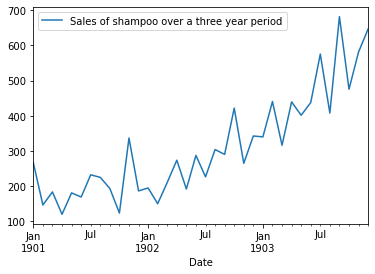

In [30]:
# Plotting the data
df.plot()
plt.show()

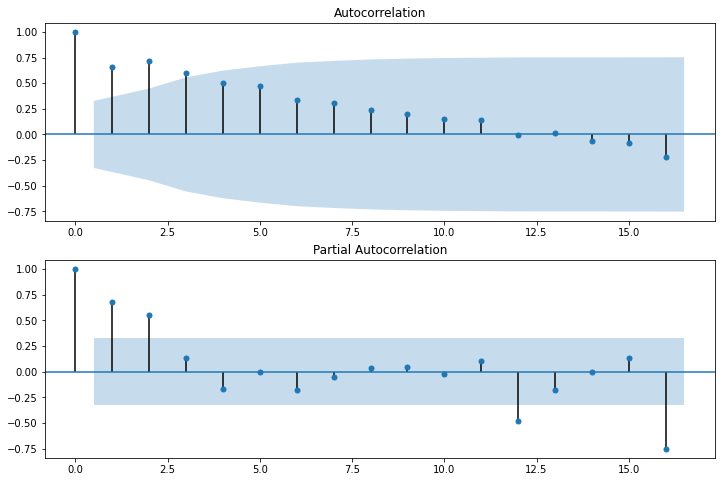

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

# Auto Corelation Plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales of shampoo over a three year period'],ax=ax1)
# Partial Auto Corelation Plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales of shampoo over a three year period'],ax=ax2)

# Arima Model

In [38]:
len(df.values)

36

predicted=387.376470, expected=440.400000
predicted=348.154215, expected=315.900000
predicted=386.308852, expected=439.300000
predicted=356.082094, expected=401.300000
predicted=446.379448, expected=437.400000
predicted=394.737254, expected=575.500000
predicted=434.915429, expected=407.600000
predicted=507.923446, expected=682.000000
predicted=435.482928, expected=475.300000
predicted=652.743783, expected=581.300000
predicted=546.343427, expected=646.900000
Test MSE: 8119.124


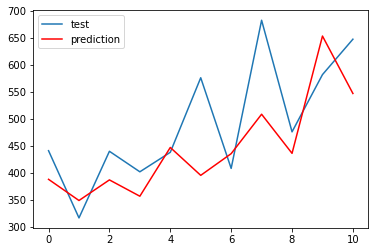

In [40]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

# Selecting values for Train and Test
X = df.values
size = int(len(X) * 0.70) # I am taking 70% for training data
train, test = X[0:size], X[size:len(X)]


history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_prediction = output[0]
    predictions.append(y_prediction)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y_prediction, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()